# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Reading the required data



In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train_length = len(train)
pid = test['PassengerId']

In [3]:
df = pd.concat([train,test], axis = 0)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

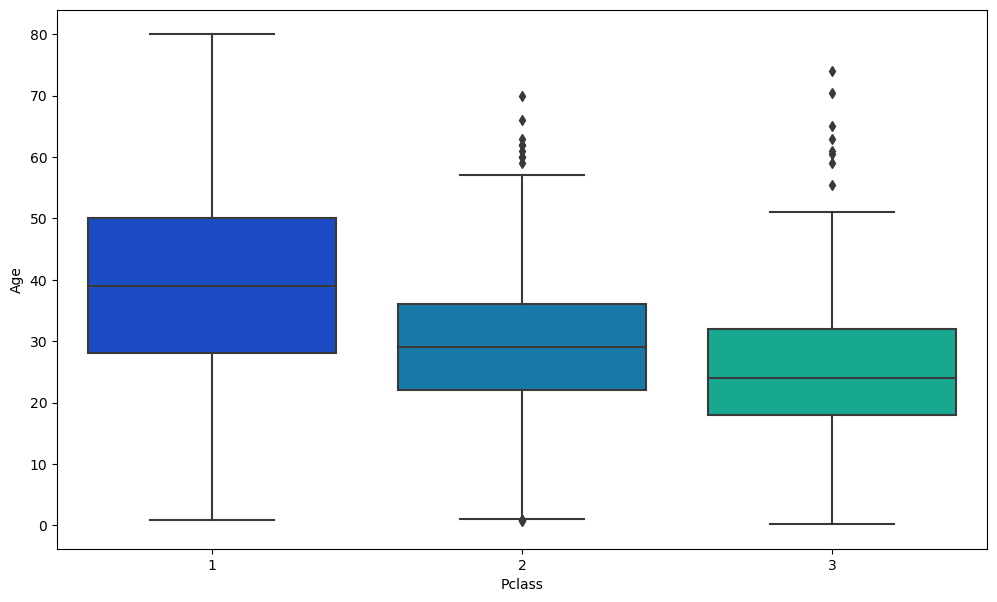

In [5]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

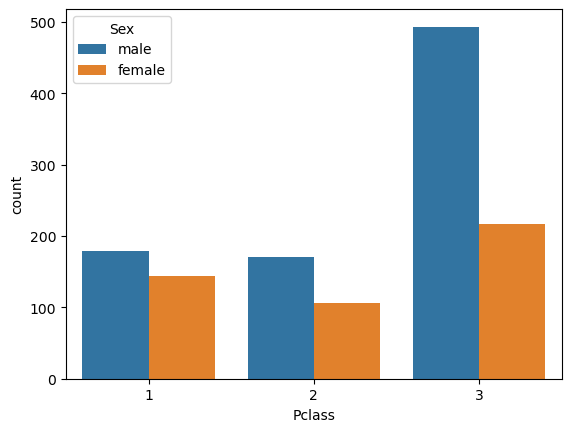

In [6]:
sns.countplot(x='Pclass', data = df,hue='Sex')

# Feature Engineering

In [7]:
# lets first take care of the null values 
# this is a concatenated dataframe hence all the suvived values from test set are Nan
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
# filling the missing ages
df.loc[df['Age'].isnull(),'Age'] = 37
df.loc[(df['Age'].isnull()) & (df['Pclass'] == 2), 'Age'] = 29
df.loc[(df['Age'].isnull()) & (df['Pclass'] == 3), 'Age'] = 24

In [9]:
df['Age'].isnull().any()

False

In [10]:
#creating new feature 'Familysize'
df['FamilySize'] = df['SibSp'] + df['Parch']+1

In [11]:
#finding the nan in Fare feature and replacing it with its mean
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].mean()

In [12]:
#creating a new feature 'Fare Per Person' 
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

In [13]:
# creating a new feature 'Title'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [14]:
df['Title'] = df['Title'].replace({'Mme' : 'Mrs', 'Ms' : 'Miss', 'Mlle' : 'Miss', 'Master' : 'Mr'})

In [15]:
df['Title'] = df['Title'].replace(['Dona','Countess', 'Dr', 'Lady', 'Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer', 'Sir'], 'Rare')

In [16]:
df['Title'].value_counts()

Mr      818
Miss    264
Mrs     198
Rare     29
Name: Title, dtype: int64

In [17]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FarePerPerson,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,Mr


## Data Preprocessing

In [18]:
df2 = df.corr()

making a correalation heatmap to see which columns are not needed

<AxesSubplot:>

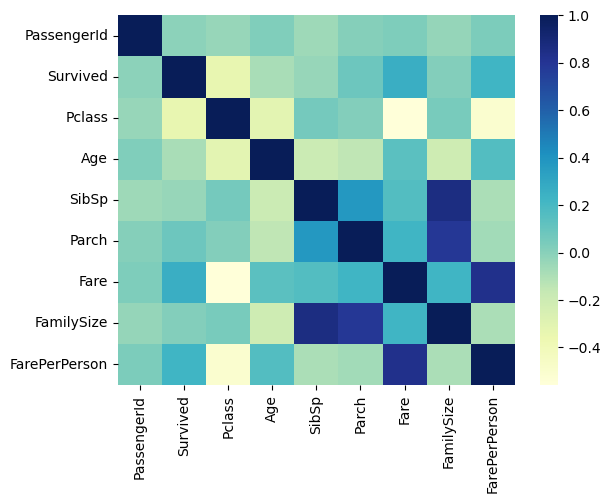

In [19]:
sns.heatmap(df2,cmap='YlGnBu')

In [20]:
df.drop(['Name','Fare','SibSp','Parch','PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [21]:
df.isnull().sum()

Survived         418
Pclass             0
Sex                0
Age                0
Embarked           2
FamilySize         0
FarePerPerson      0
Title              0
dtype: int64

In [22]:
df.head(2)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
0,0.0,3,male,22.0,S,2,3.62500,Mr
1,1.0,1,female,38.0,C,2,35.64165,Mrs


lets split the data again into train and test set

Biforcating the merged data frame again

In [23]:
train = df[:train_length]
print(train.shape)

(891, 8)


In [24]:
test = df[train_length:]
print(test.shape)

(418, 8)


In [25]:
# Removing the survived column from test dataframe
test.drop('Survived',axis=1,inplace=True)

In [26]:
train.head(2)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
0,0.0,3,male,22.0,S,2,3.62500,Mr
1,1.0,1,female,38.0,C,2,35.64165,Mrs


In [27]:
test.head(2)

,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
0,3,male,34.5,Q,1,7.8292,Mr
1,3,female,47.0,S,2,3.5000,Mrs


In [28]:
#we know there are two null values in  train data set
train.dropna(inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    float64
 1   Pclass         889 non-null    int64  
 2   Sex            889 non-null    object 
 3   Age            889 non-null    float64
 4   Embarked       889 non-null    object 
 5   FamilySize     889 non-null    int64  
 6   FarePerPerson  889 non-null    float64
 7   Title          889 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.5+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            418 non-null    float64
 3   Embarked       418 non-null    object 
 4   FamilySize     418 non-null    int64  
 5   FarePerPerson  418 non-null    float64
 6   Title          418 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 26.1+ KB


In [31]:
oe = OrdinalEncoder()
sc = StandardScaler()

In [32]:
#creating a simple function to apply ordinal encoding to both train and test data
data = [train,test]
for x in data:
    a = x['Sex'].values
    b = x['Embarked'].values
    c = x['Title'].values
    a = np.reshape(a, (-1,1))
    b = np.reshape(b, (-1,1))
    c = np.reshape(c,(-1,1))
    x['Sex'] = oe.fit_transform(a)
    x['Embarked'] = oe.fit_transform(b)
    x['Title'] = oe.fit_transform(c)
    


In [33]:
train.sample(5)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
347,1.0,3,0.0,37.0,2.0,2,8.050000,2.0
202,0.0,3,1.0,34.0,2.0,1,6.495800,1.0
338,1.0,3,1.0,45.0,2.0,1,8.050000,1.0
140,0.0,3,0.0,37.0,0.0,3,5.081933,2.0
719,0.0,3,1.0,33.0,2.0,1,7.775000,1.0


In [34]:
train.columns.to_list()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'Embarked',
 'FamilySize',
 'FarePerPerson',
 'Title']

In [35]:
data = [train,test]

In [36]:
#Scaling the data for better of performence of the algorithems

for x in data:
    x[['Pclass','Sex','Age',
       'Embarked','FamilySize',
       'FarePerPerson','Title']] = sc.fit_transform(x[['Pclass','Sex','Age',
                                                        'Embarked','FamilySize',
                                                        'FarePerPerson','Title']])
    

In [37]:
train.sample(5)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
295,0.0,-1.572211,0.735342,0.443415,-1.939555,-0.561804,0.222101,0.021778
103,0.0,0.825209,0.735342,0.142435,0.586840,-0.561804,-0.311265,0.021778
358,1.0,0.825209,-1.359911,0.443415,-0.676357,-0.561804,-0.332944,-1.467520
223,0.0,0.825209,0.735342,0.443415,0.586840,-0.561804,-0.332480,0.021778
397,0.0,-0.373501,0.735342,1.120620,0.586840,-0.561804,0.173963,0.021778


In [38]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize',
       'FarePerPerson', 'Title'],
      dtype='object')

# Out of Fold Predictions

In [39]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

for train_idx, test_idx in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [40]:
#making function to get scores from models

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    
    y_test_pred = model.predict(X_test)
   
    test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    
    test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
    
    test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    
    return test_accuracy, test_mcc, test_f1

# Initial scores without using  hyperparameter tuning

In [41]:
models = [SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), MLPClassifier(),
          RandomForestClassifier() , LogisticRegression(), GradientBoostingClassifier()]

In [42]:
for model in models:
    test_ac_sc = []
    test_mcc_sc = []
    test_f1_sc = []

    #scores = []

    for train_idx, test_idx in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
        #scores.append(get_score(model, X_train, X_test, y_train, y_test))
        test_ac_sc.append(get_score(model, X_train, X_test, y_train, y_test)[0])
        test_mcc_sc.append(get_score(model, X_train, X_test, y_train, y_test)[1])
        test_f1_sc.append(get_score(model, X_train, X_test, y_train, y_test)[2])


    print(f'for model: {model}')
    print('accuracy score :',np.mean(test_ac_sc))
    print('mcc score :',np.mean(test_mcc_sc))
    print('f1 score :',np.mean(test_f1_sc))
    print('\n')

for model: SVC()
accuracy score : 0.814384561670793
mcc score : 0.602579069905728
f1 score : 0.8113547393786152


for model: KNeighborsClassifier()
accuracy score : 0.8155145051736179
mcc score : 0.6074389524355546
f1 score : 0.8142979939236991


for model: DecisionTreeClassifier()
accuracy score : 0.7637973719291564
mcc score : 0.5014782483378313
f1 score : 0.7695114431902629


for model: MLPClassifier()
accuracy score : 0.8166317526820288
mcc score : 0.607310376117068
f1 score : 0.8087649264964663


for model: RandomForestClassifier()
accuracy score : 0.8031676506062337
mcc score : 0.5785946256664494
f1 score : 0.8050540627904577


for model: LogisticRegression()
accuracy score : 0.7975306290865232
mcc score : 0.5690471358574036
f1 score : 0.7959394881577933


for model: GradientBoostingClassifier()
accuracy score : 0.8267504602297976
mcc score : 0.6318567986602908
f1 score : 0.8246946616797113




# Hyperparameters tuning

In [43]:
param_rf = {
    'n_estimators': [25,50, 100, 150],
    'max_depth': [2, 4, 6, 8, 10, 15],
    'min_samples_leaf': [2, 4, 6,8,10],
    'n_jobs': [-1],
    'criterion' :['gini', 'entropy'],
    'max_features': ["sqrt", "log2"]
}

In [44]:
#grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_rf, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_rf = grid_search.best_params_
best_rf = {'criterion': 'gini',
             'max_depth': 10,
             'max_features': 'sqrt',
             'min_samples_leaf': 2,
             'n_estimators': 50,
                 'n_jobs': -1}

In [45]:
param_knn = {
    'n_neighbors': [5,10, 15, 30,60],
    'weights' : ['uniform', 'distance'],
    'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [46]:
#grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_knn, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_knn = grid_search.best_params_
best_knn = {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [47]:
param_lr = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C'       : [100, 10, 1.0, 0.1, 0.01]
}

In [48]:
#grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_lr, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_lr = grid_search.best_params_
best_lr = {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
param_dt = {
    'max_depth': [2, 4, 6, 8, 10, 15],
    'min_samples_leaf': [2, 4, 6,8,10],
    'criterion' :['gini', 'entropy','log_loss'],
    'max_features': ["sqrt", "log2"]
}

In [50]:
#grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_dt, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_dt = grid_search.best_params_
best_dt = {'criterion': 'gini','max_depth': 15,'max_features': 'log2','min_samples_leaf': 4}

In [51]:
param_svc = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf']}

In [52]:
#grid_search = GridSearchCV(estimator=SVC(), param_grid=param_svc, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_svc = grid_search.best_params_
best_svc = {'C': 1, 'kernel': 'rbf'}

In [53]:
param_mlp = {'hidden_layer_sizes': [(10,), (50,), (100,)],
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'alpha': [0.0001, 0.01, 0.1],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [54]:
#grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_mlp, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_mlp = grid_search.best_params_
best_mlp = {'activation': 'relu','alpha': 0.1,'hidden_layer_sizes': (50,),
            'learning_rate': 'adaptive','solver': 'adam'}

In [55]:
param_gbc = {'n_estimators': [50, 100],
              'learning_rate': [ 0.01, 0.1,1],
              'max_depth': [3, 5, 7, 9],
              'subsample': [0.5, 0.7, 0.9],
              'min_samples_split': [2, 5, 10]}

In [56]:
#grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_gbc, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#best_gbc = grid_search.best_params_
best_gbc = {'learning_rate': 0.1,'max_depth': 3,'min_samples_split': 2,
            'n_estimators': 100,'subsample': 0.7}

# Stacking the models together (Ensembling)

In [57]:
#making estimators list with optimum parameters
estimators = [
    
    ('lr', LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
    ),
    
    ('knn', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, weights= 'uniform')
    ),
    
    ('gbc',GradientBoostingClassifier(learning_rate=0.1,max_depth= 3,min_samples_split= 2,
            n_estimators= 100,subsample= 0.7)
    ),
    
    ('MLP',MLPClassifier(activation= 'relu',alpha= 0.1,hidden_layer_sizes= (50,),
            learning_rate='adaptive',solver= 'adam')
    ),
    
    ('DTC', DecisionTreeClassifier(criterion= 'gini',max_depth= 15,max_features= 'log2',min_samples_leaf= 4)
    )
    
    
]

FEstimator = RandomForestClassifier(criterion= 'gini',max_depth= 10,
             max_features= 'sqrt',min_samples_leaf= 2,
             n_estimators=50,n_jobs=-1,)

In [58]:
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=FEstimator,
    cv=5
)

In [59]:
clf.fit(X,y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(solver='newton-cg')),
                               ('knn', KNeighborsClassifier()),
                               ('gbc',
                                GradientBoostingClassifier(subsample=0.7)),
                               ('MLP',
                                MLPClassifier(alpha=0.1,
                                              hidden_layer_sizes=(50,),
                                              learning_rate='adaptive')),
                               ('DTC',
                                DecisionTreeClassifier(max_depth=15,
                                                       max_features='log2',
                                                       min_samples_leaf=4))],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          max_features='sqrt',
                                                          min_

In [60]:
get_score(clf,X_train, X_test, y_train, y_test)

(0.8192090395480226, 0.6130983732965785, 0.8174582479667225)

In [61]:
pred_final = clf.predict(test)
pred_final

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [62]:
pred_final_df = pd.DataFrame(pred_final, columns=['Survived'])

In [63]:
test['Survived'] = pred_final_df['Survived'].astype('int')

In [64]:
test['PassengerId'] = pid.astype('int')

In [65]:
#test.dtypes

In [66]:
submission = test[['PassengerId', 'Survived']]
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [67]:
submission.to_csv('submission.csv', index=False)

This was my attempt to create a stacked model I'm still a begineer in this. I today learned its possible to create a stacked model with intermediate layers too hence the ensemble will look like, 'intital estimators - intermediate estimators - final estimators'. I'll make it next but with better hyperparameter tuning methods than this one. Thanking you please upvote if you like my work ...Happy Kaggling